In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

In [2]:
npzfile = np.load('data/data_d1_d2_data.npz')
features = npzfile['features']
labels = npzfile['labels']
groups = npzfile['groups']
features = np.nan_to_num(features)

In [3]:
column_names = pd.read_csv('column_used', delimiter=",")
column_names = column_names.columns
len(column_names)

20

In [4]:
shap_interaction_values_load = np.load("values/interaction_value_d1_d2.npz")
shap_interaction_values = shap_interaction_values_load["values"]

The figure layout has changed to tight
The figure layout has changed to tight


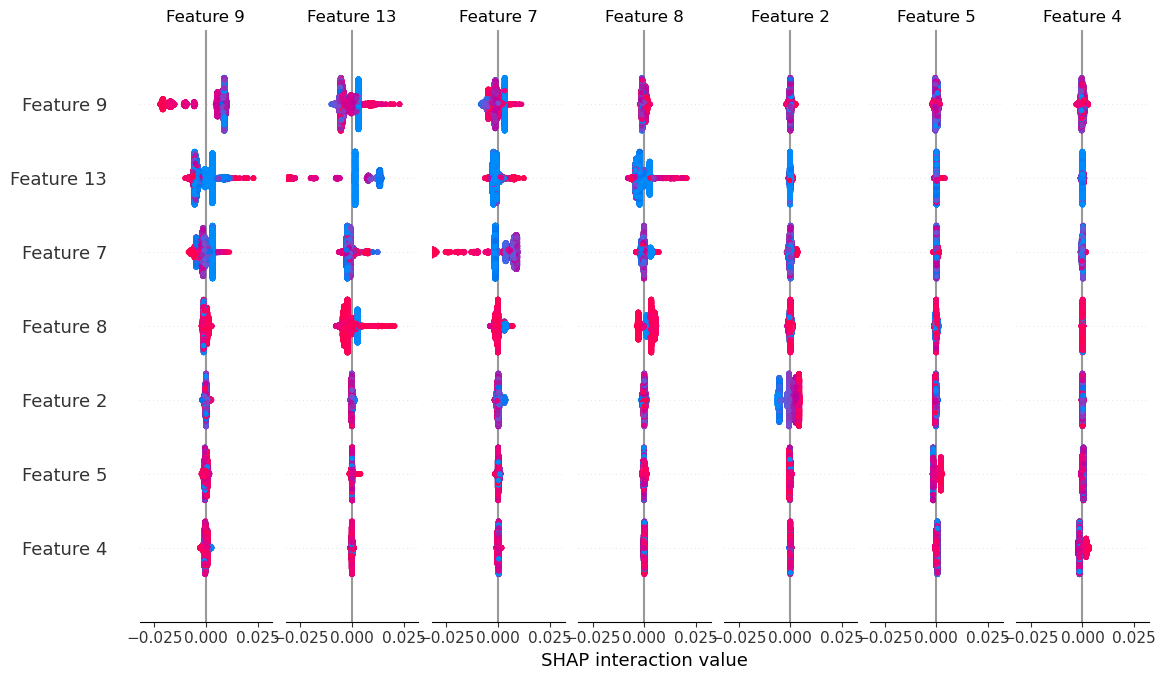

In [5]:
shap.summary_plot(shap_interaction_values[1], features)

9 = RAVLT_immediate  
13 = FAQ  
7 = ADAS11  
8 = MMSE  
2 = WholeBrain  
5 = MidTemp  
4 = Fusiform  

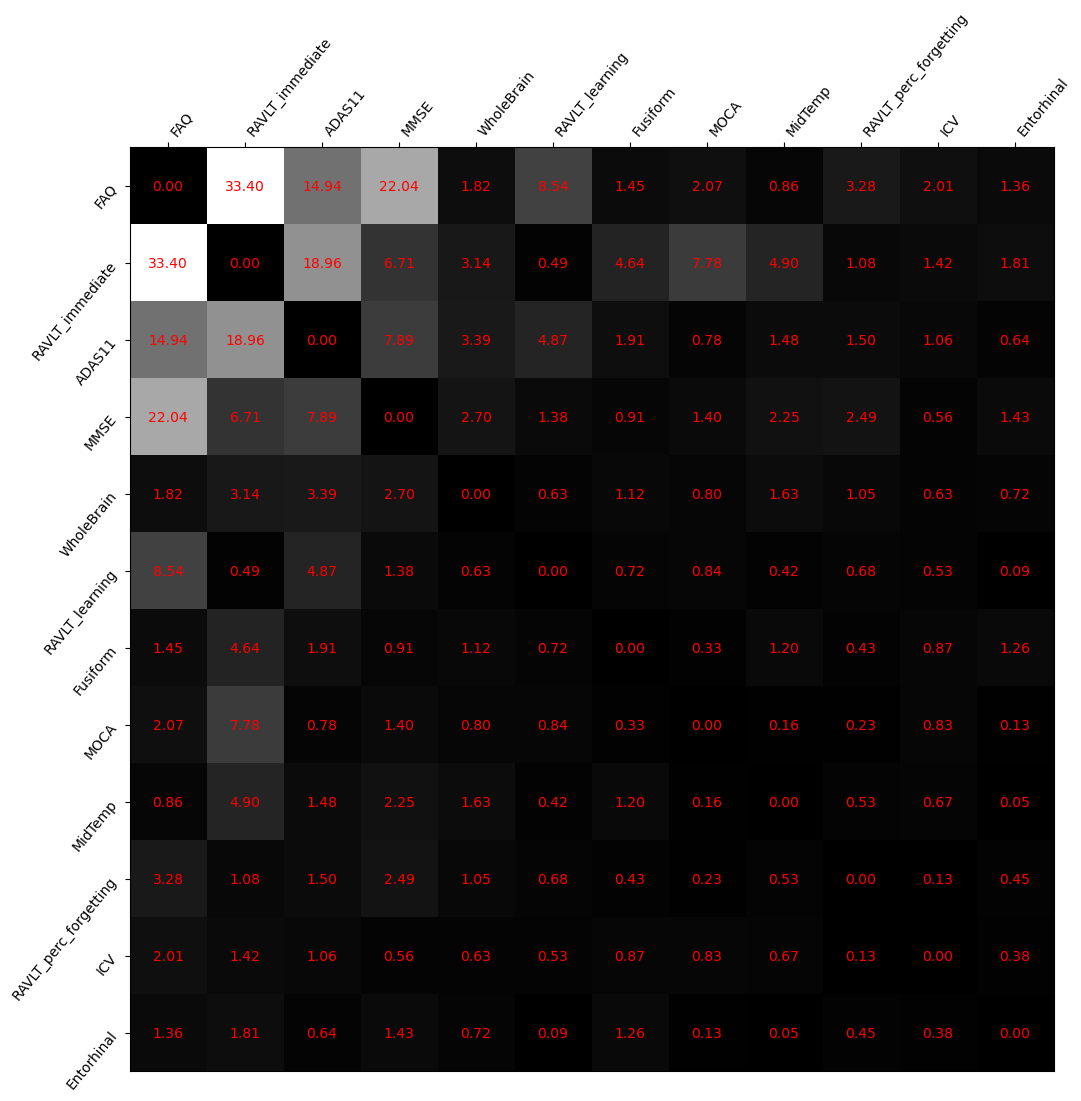

In [6]:
interaction_matrix = np.abs(shap_interaction_values[1]).sum(0) ## impose all sample matrix and add them by value
for i in range(interaction_matrix.shape[0]):
    interaction_matrix[i, i] = 0
inds = np.argsort(-interaction_matrix.sum(0))[:12]
sorted_ia_matrix = interaction_matrix[inds, :][:, inds]
plt.figure(figsize=(12, 12))
plt.imshow(sorted_ia_matrix,cmap='gray')
# Add annotations for each cell
for i in range(sorted_ia_matrix.shape[0]):
    for j in range(sorted_ia_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(sorted_ia_matrix[i, j]), ha='center', va='center', color='red')

plt.yticks(
    range(sorted_ia_matrix.shape[0]),
    column_names[inds],
    rotation=50.4,
    horizontalalignment="right",
)
plt.xticks(
    range(sorted_ia_matrix.shape[0]),
    column_names[inds],
    rotation=50.4,
    horizontalalignment="left",
)
plt.gca().xaxis.tick_top()
plt.show()
##Light colors show strong interaction effects